# Programming Lab 2: Neural Networks and SVMs

# 1 Non parametric classification 

## 1.1 Support vector classifiers

We will start with an application of Support Vector Machines. To use SVM we first create a simple classification dataset with the "make_classification" function from scikit-learn. Here the parameter class_sep is used to quantify the level of separation of the two clusters (we set it to 3 to get )

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn import svm, datasets

from sklearn.datasets import make_gaussian_quantiles

X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1,class_sep = 2.2)

f, axarr = plt.subplots(2, sharex=True)
axarr[0].scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=30, edgecolor='k',cmap=plt.cm.RdYlGn)

axarr[0].set_title('Original dataset')
f.subplots_adjust(hspace=0.3)


plt.show()



### 1.1.1 Preliminary step
Using the LinearSVC function from scikit-learn, learn the separating plane for this dataset

In [ ]:
# put your code here (This should be no more than 2 lines)



In [ ]:
# Once you have learned the model, you can plot the model using the code below

x = np.linspace(X1[:,0].min()-1,X1[:,0].max()+1,100)
y = np.linspace(X1[:,1].min()-1,X1[:,1].max()+1,100)


xx,yy = np.meshgrid(x,y)

print(xx.ravel())
print(yy.ravel())
print(np.c_[np.transpose(xx.ravel()),np.transpose(yy.ravel())])

labels = model.predict(np.c_[np.transpose(xx.ravel()),np.transpose(yy.ravel())])

Z = labels.reshape(xx.shape)


axarr[1].contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
axarr[1].scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=30, edgecolor='k',cmap=plt.cm.RdYlGn)


plt.show()



### 1.1.2\. Extracting the support vectors 

The LinearSVC function from scikit-learn does not return the support vectors directly. To get access to the support vectors, one possibility is to use the more general SVC function together with a linear kernel, and then use the .support_vectors_ function. Apply this to the dataset and check that you SVM is maximizing the margin 


## 1.2 From Linear SVC to Kernel SVC

In this second exercice, we will study the limitations of simple linear Kernel. We consider a dataset that is not linearly separable in the original space. 

In [ ]:
from sklearn.datasets import make_circles

X2, Y2 =  make_circles(noise=0.1, factor=0.2, random_state=1)



f, axarr = plt.subplots(2, sharex=True)
axarr[0].scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,
            s=30, edgecolor='k',cmap=plt.cm.RdYlGn)

axarr[0].set_title('Original dataset')
f.subplots_adjust(hspace=0.3)


plt.show()


### 1.2.1 Kernel SVM

For the circle dataset above, use the SVC function first with a linear kernel, then with an RBF kernel and compare the results. Re-use the lines from Exercice 1.1.1 to represent the separation of space given by each classifier.

In [ ]:
# put your code here


### 1.2.2 A face recognition example

(adapted from L. Rajesh)

As a second application of kernel SVM, we will train a maximum margin classifier to perform face recognition

Start by downloading the faces from your account on Kaggle : https://www.kaggle.com/shuchirb/olivetti-faces/version/1 and put the two files in the folder of your jupyter project

In [39]:
import numpy as np
faces_image = np.load('olivetti_faces.npy')
faces_target = np.load('olivetti_faces_target.npy')

- What is the size of the dataset ?
- What does the data look like ? How about the targets ?

Reorganize the dataset so that it is of size "number of images" x image size (number of pixels) and plot some of the images using the following lines

In [44]:
import warnings
warnings.filterwarnings("ignore")
from skimage.io import imshow

In [ ]:
# put your code here (this is 2 lines). You might want to use the 'gray' colormap

We will now train an SVM classifier on the dataset. Training the SVM on the raw image data is not a good idea in general because there is a lot of redundancy within a set of images and because training a classifier with training samples on a high dimensional space will not give robust predictions (recall the discussion on the curse of dimensionality). To alleviate this issue, we will learn a classifier not on the image themselves but on their principal components (a concept that we will discuss later in the class). The principal component can be understood as an approximation of the faces.  




In [ ]:
from __future__ import print_function

from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

#### 1.2.2.a 
Split the dataset into a training and a test set using the "train_test_split" function and check the length of each part

To reduce the dimension of the images, we stack the images in a matrix and extract a subset of directions along which the images are varying the most (i.e we discard the dimensions which are constant for most images). We then write the images in the new (reduced) space.

#### 1.2.2.b 
Use the lines below to first compute the 150 most important dimension from your X_train data and then expression the original data in the new basis (as a combination of the first 150 components)

In [ ]:
n_components = 150
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(Xtrain)


eigenfaces = pca.components_.reshape((n_components, n_row, n_col))

# "Projecting training and test data on the eigenfaces basis"
t0 = time()
Xtrain_pca = pca.transform(Xtrain)
Xtest_pca = pca.transform(Xtest)

Plot some of the eigenfaces using the imshow function. How do they look like ?

Training an SVM with Radial Basis Functions requires to set 2 main parameters: the first one is the penalty parameter C (smaller values of C correspond to more regularization). The second one is the parameter $\gamma$ which determines how spread out the radial basis functions are. Recall that RBF have the general form


$$\kappa(\boldsymbol{x},\boldsymbol{x}') = \gamma\exp(-\gamma\|\boldsymbol{x}-\boldsymbol{x}'\|^2)$$

An elegant way to find optimal parameters is to use the function "GridSearchCV" from scikit-learn. We start by defining a list of values for C and $\gamma$,

- Define a param_grid list encoding values for 'C' ([1e3, 5e3, 1e4, 5e4, 1e5]) and 'gamma' ([0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]) (see http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html if you are not sure how to use GridSearchCV)

- Then combine an SVC classifier with the gridSearch for the parameters and fit the combined model to your training data (i.e the output to the dimensionality reduction step)

#### 1.2.2c Evaluate your kernel SVC based on the test set. 

In [ ]:
# put your code here 



Which faces are misclassified ? who do they belong to ? For a given misclassified image, compare the faces of the (true) model and the person returned by the classifier. How similar are they ?

# 2 Neural Networks 

## 2.1 A simple perceptron

In this exercice we will code simple perceptron together with its learning rule. This is a good exercice to code a model from scratch

#### 2.1.1 DataSet
As we are only consider a single artificial unit, we want the dataset to be linearly separable. For this reason, we will re-use the data from exercice 1.1. 

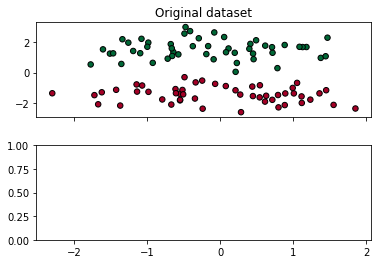

[1 1 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0
 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1
 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0]


In [53]:
X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1,class_sep = 1.5)

f, axarr = plt.subplots(2, sharex=True)
axarr[0].scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=30, edgecolor='k',cmap=plt.cm.RdYlGn)

axarr[0].set_title('Original dataset')
f.subplots_adjust(hspace=0.3)


plt.show()

print(Y1)

Recall that the RSS loss in the case of the perceptron is defined as 

\begin{align}
E_P(\boldsymbol{w}) = -\sum_{n\in \mathcal{M}} \boldsymbol{w}^T\boldsymbol{\phi}_n t_n\end{align}

Where $\mathcal{M}$ denote the set of misclassified patterns $(t_\mu,\boldsymbol{x}_\mu)$

Also recall that the perceptron follows a linear model of the form

\begin{align}
y(\boldsymbol{x}) = f(\boldsymbol{w}^T\boldsymbol{\phi}(\boldsymbol{x}))
\end{align}

Where $f(a) = +1$ if $a\geq 0$ and $f(a)=-1$ if $a\leq 0$. 

#### 2.1.2 Main function 


Recall that for a simple perceptron, the weights are updated as 

\begin{align}
\boldsymbol{w}^{(t+1)} \leftarrow \boldsymbol{w}^{(t)}- \eta\nabla E_P(\boldsymbol{w})
\end{align}

which when we substitute for the gradient $\nabla E_P$, reads as

$$\boldsymbol{w}^{(t+1)} \leftarrow \boldsymbol{w}^{(t)}+ \eta\boldsymbol{\phi}_n t_n$$

Noting that this update is only performed on the misclassified points.


We will define a main function as below and build each of the necessary routines through exercices 2.1.3 to 2.1.5

In [ ]:
def main():
    
    data = []   # add your data (from 2.1.1) here with a first column encoding the 
                # intercept/bias (the column is thus a column of 1's) and 
                # replacing the 0 with -1
    
    w = []      # pick a first choice for the weights
    
    train_weights(data, weights=weights,np_epoch = 10,l_rate = 1.0, 
                  do_plot = True, stop_early=True)
    
        
if __name__='__main__':
    main()


#### 2.1.3. Prediction function

Start by defining a function that takes as inputs a point from the training set and a vector of weights and return the output $y(\boldsymbol{x})$ to the perceptron 

In [ ]:
# put your code here

def predict(inputs, weights):
    
    # put your code here


#### 2.1.4 Error function 

Then write a function that computes the error made by the perceptron by computing the ratio of correctly classified points to the total number of points. The function should return this ratio. We will want the iterations to stop whenever this ratio is 1.


In [ ]:
# put your code here 

def accuracy(matrix, weights):

    # put your code here
    


#### 2.1.5  Training function 

We now want to build the training function. This function is a simple application of the update rule above. 

- We define the __number of epochs__ __np_epoch__ to be the number of times we cycle through the whole training set. So we want a first loop here


- Before updating the weights you want to use the accuracy function above to determine whether any update is actually really necessary. If not use break to end the function if your variable stop_early is true


- We then need a second loop that cycle through the points from the training set and compute the prediction for each point. If the prediction is correct then we do not use the point for weight update. If the point is incorrectly classified then we use the update rule above


In [ ]:
def train_weights(matrix,weights,np_epoch=10,l_rate=1.0, 
                  do_plot = False, stop_early = True, verbose = True):
    
    # do_plot and verbose are parameters that you can use to pr
    
    for epoch in range(np_epoch):

        
        
        # put your code here
        
        
    return weights

#### 2.1.5. Learning with the Perceptron algorithm

Run the main either here or put everything in a single main.py file and run it from the terminal. When your code is running, write a function that plot the data together with the decision boundary

In [ ]:
def plot(data,weights=None,title="Prediction matrix"):


    # put your code here

return 1

## 2.2 Training and Testing in MLP

As for other classifiers, scikit-learn provides a wide range of tools to train multilayer perceptrons. In this exercice we will compare the use of MLPs with Kernel SVMs


### 2.2.1 MLP vs Kernel SVM
Consider the dataset below. 

In [ ]:
X,y = make_circles(noise=0.2, factor=0.5, random_state=1)

#### 2.2.1.a

- Split the dataset into a training and test part 
- Train a support vector classifier with RBF kernels and parameters $\gamma=2$ and $C=1$
- Train a Multilayer Perceptron with first __one hidden layer__ and __100 units__ (default) and then __5 hidden layers__ and __20 units__ in each layer.

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# put your code here

#### 2.2.1.b

Using the lines from Exercice 1.1.1, represent the decision boundaries of each classifiers 
on three subplots and superimpose the circle dataset on top of those decision boundaries. How do the decision boundaries vary as the number of neurons and number of layers vary ?

## 2.3 Convolutional Neural Networks for image classification

(adapted from R.Hon)

In this example we will learn how to train and use convolutional neural network for image recognition. Start by logging on Kaggle and download the MNIST Data : https://www.kaggle.com/c/digit-recognizer/data

Then store the content of the csv files using pandas in a train and a test variables

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# put your code here

In this exercice, we will use Keras, which is a high level library which runs on top of Tensor Flow and enable fast experimentation with deep neural networks

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Using the tools form the pandas library, look at your data. What is the size of the training set? What size is the test set? What does the first column of each pandas data array contain ?

### 2.3.1 Displaying the images

Display the first few images from the MNIST dataset using imshow or any other function of your choice

In [ ]:
# put your code here



When building a convolutional neural network, we usually combine convolutions with a step called "pooling" in which the output to the convolution is further postprocessed to reduce the size of the representation or speed the computation, or make the feature detected more robust

An example of convolutional neural network is shown below. You can see that the network is stacking convolution layers and pooling layers.

In __convolutional layers__. A filter (smaller dark square) is moved across the image and the network compute e local weighted average of the pixels from the input image by using as weights the values on the filter. 

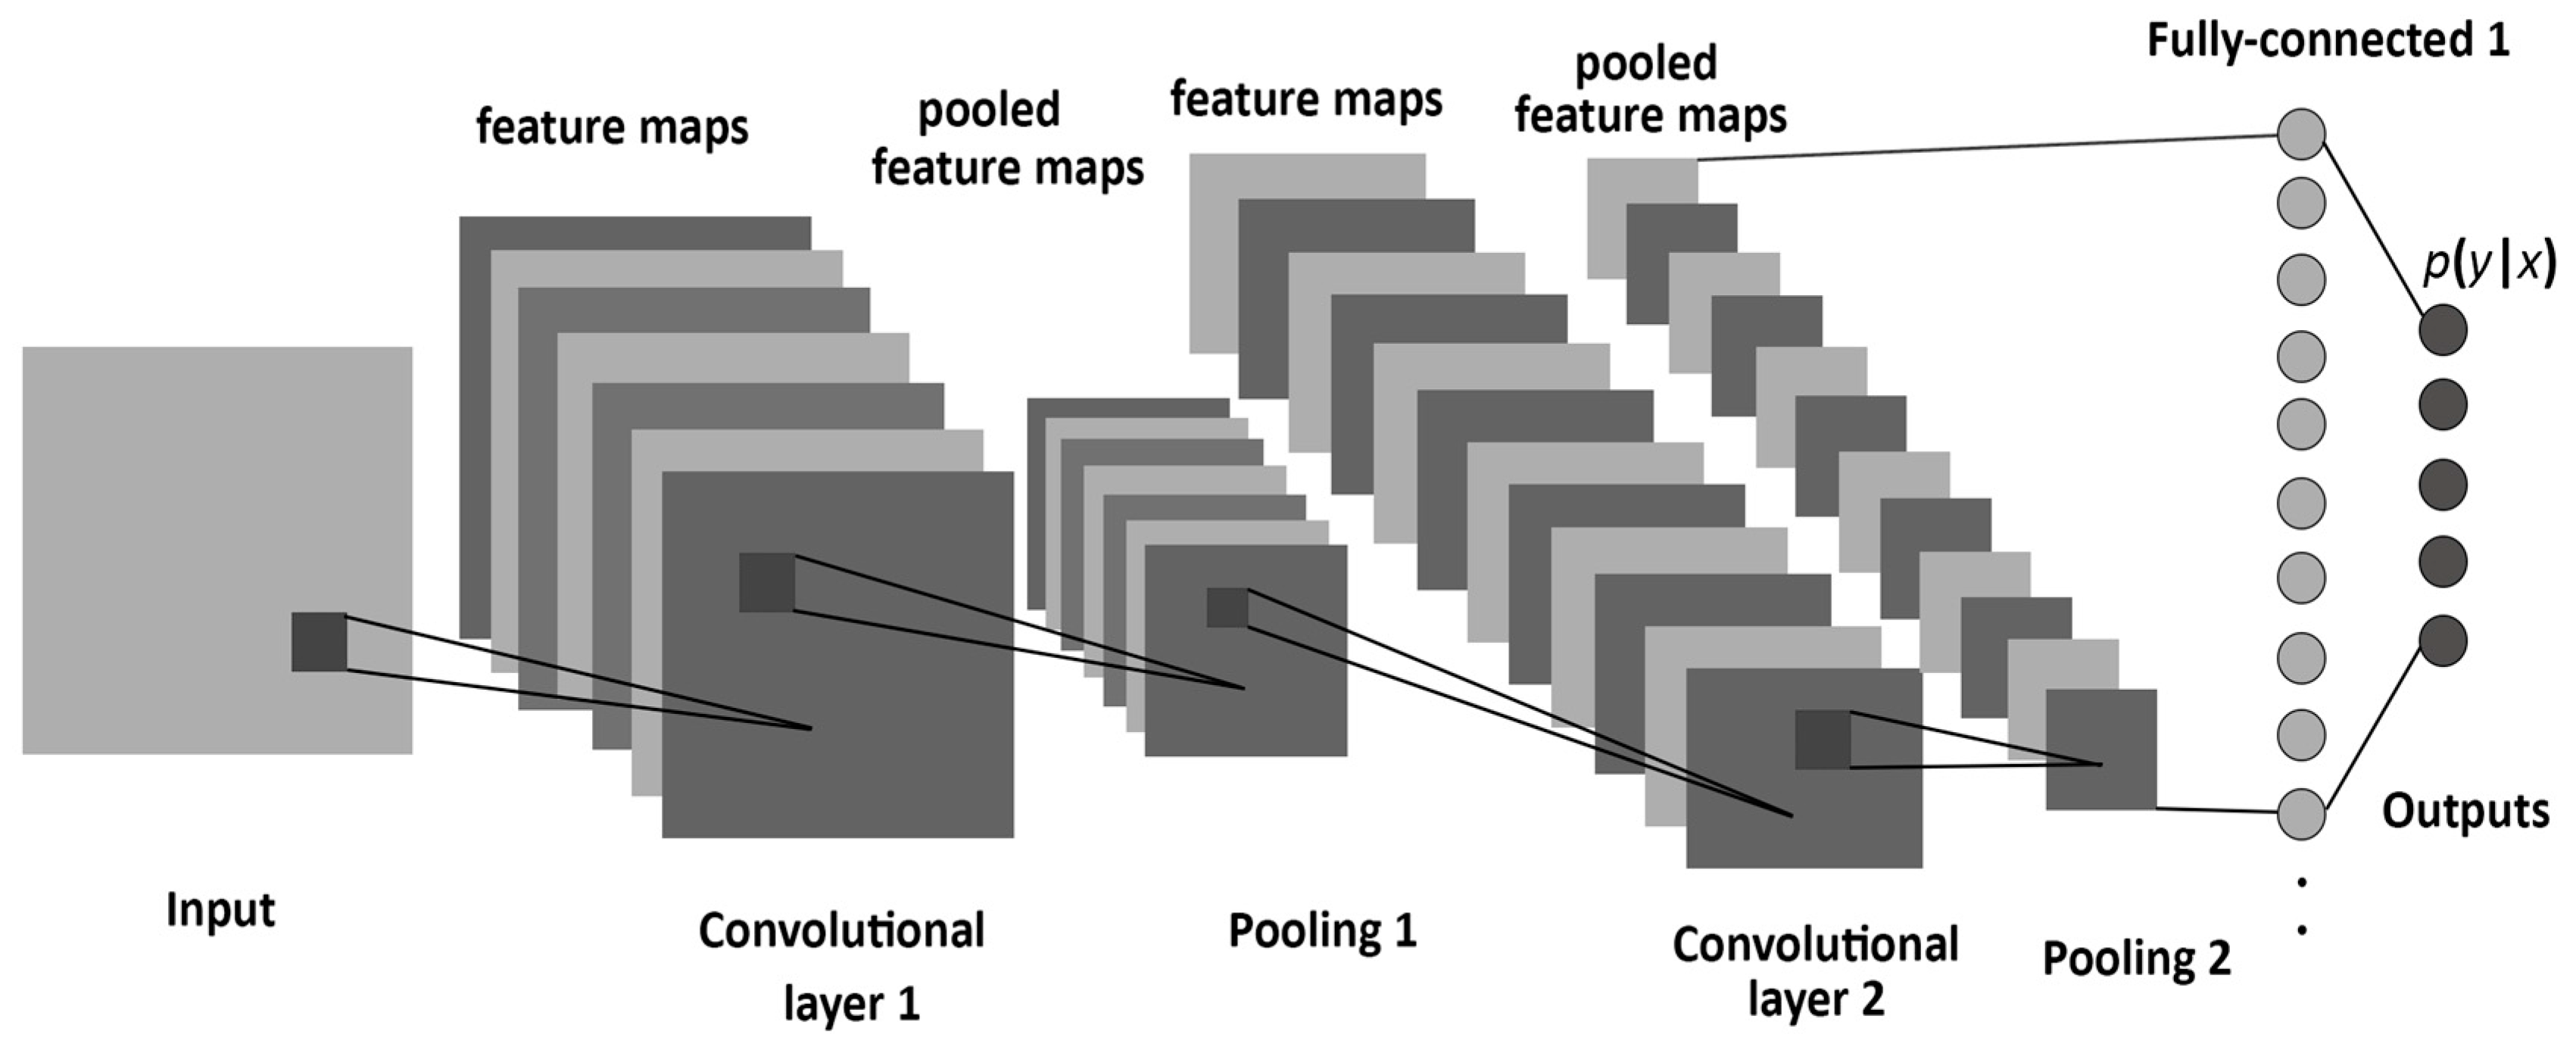

In [59]:
from IPython.display import Image
Image(filename ="convolutionNet1.png", width=800, height=800 )

In __pooling layers__, the original image is decomposed into subregions and an operator is then applied to summarize the content of each region. The most common pooling approach (known as "MaxPooling") is to take the max from each subregion.

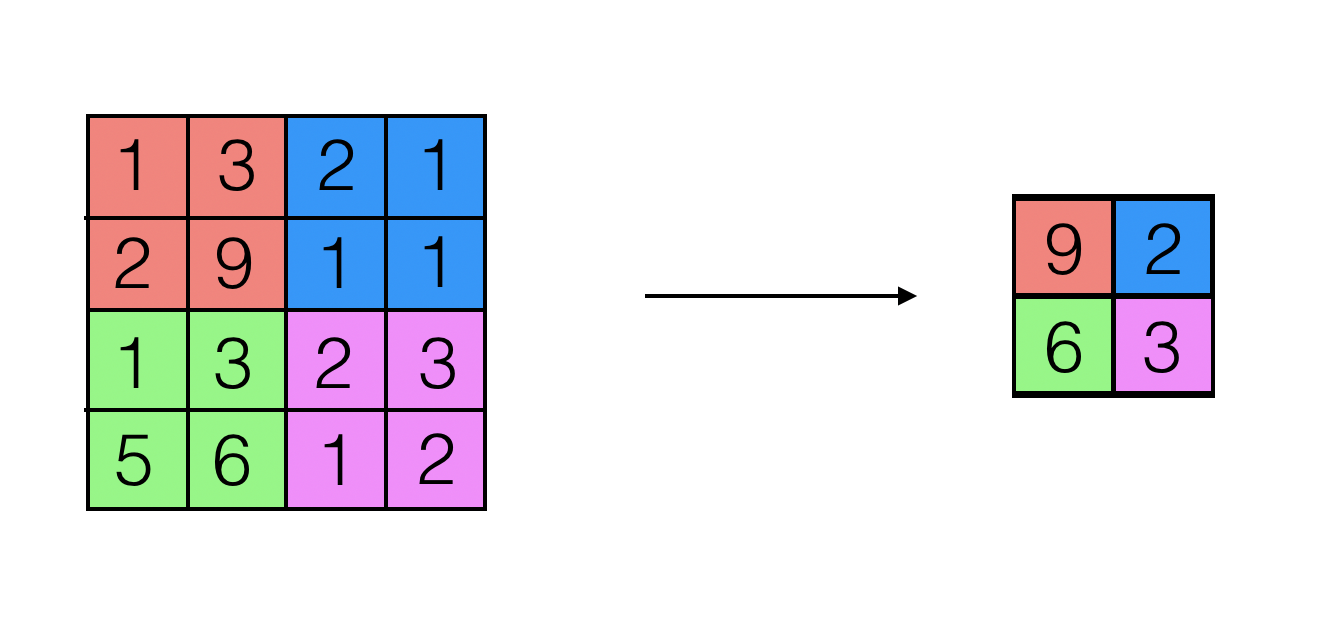

In [69]:
Image(filename ="maxpool1.png", width=800, height=800 )


In this case, the cell 


Is summarized through its maximum value $9$.

__MaxPooling__ is used essentially because it has been found to work well in practice. A somewhat  intuition for the MaxPooling operator is that a high number will be preserved across the image if it appears in several regions. If you assume an input image, a large number on the output of a convolutional filter is likely to mean that the filter has detected a particular feature (vertical edge,...). The idea of MaxPooling is to preserve such feature detection properties. When a value is high, we want this information to be passed to the next layer because it means the filter detected something  

__MaxPooling__ has two fixed parameters : the __filter size__ and the __stride__

- The filter size is the size of each subregion to which you apply the max operator
- The stride is by how much you slide the first region to define the second region. You see that in the example above, the left corner has to be moved by 2 elements/pixels to be mapped onto the left corner of the second subregion. So the __stride__ is __2__

Keras provides two APIs

- The sequential API which enables to create models layer by layer but does not enable to create models with shared layers or multiple inputs and outputs

- The functional API which gives more flexibility enabling to connect any layer to any other layers, and hence makes easier the creation of mode advanced models such as residual neural networks

### 2.3.2 Building the architecture 

In this exercice we will use the sequential API to build a LeNet (http://yann.lecun.com/exdb/lenet/) 5 Architecture. The LeNet5 Architecture is shown below.

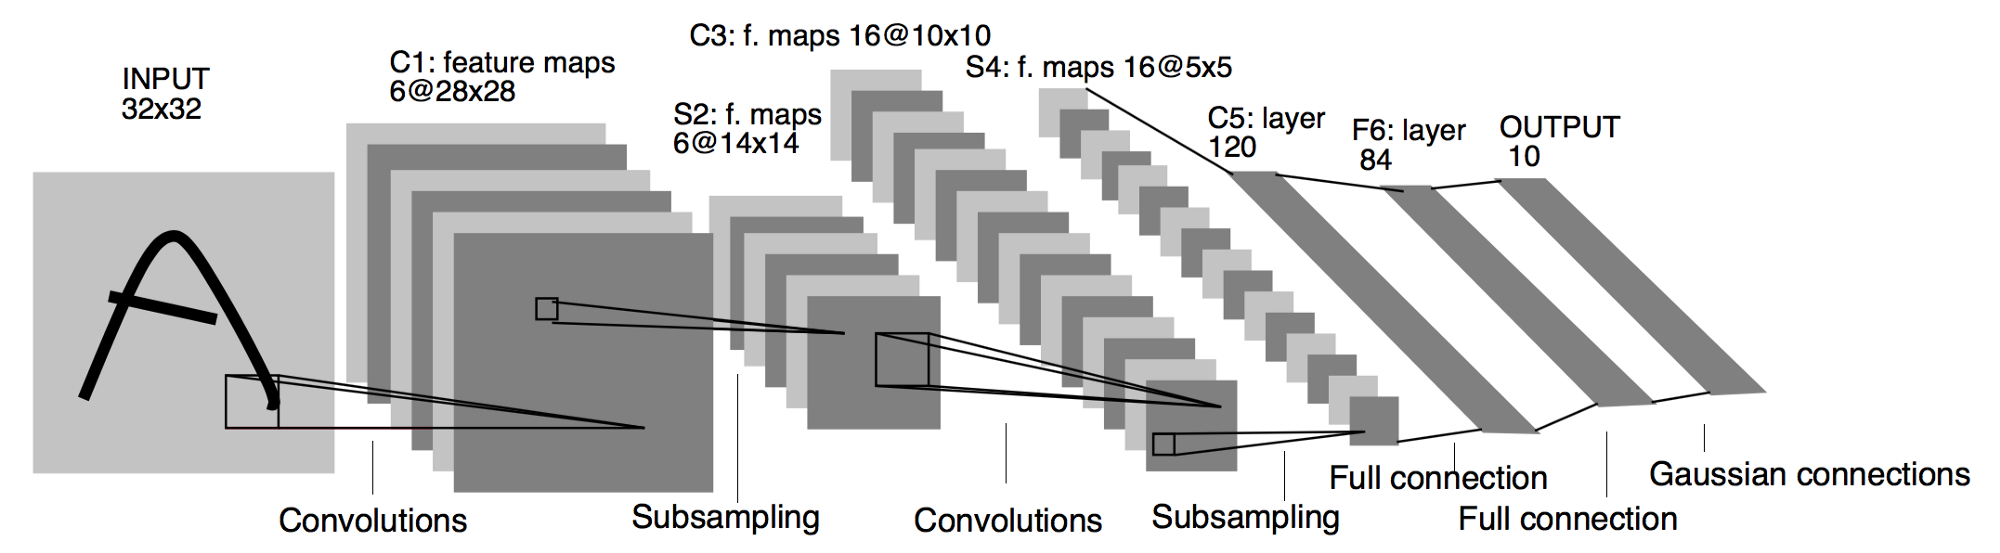

In [60]:
Image(filename ="LeNet5.png", width=800, height=800 )

We will follow this architecture mostly. Write a function build_cnn_model which takes as input the size of your final feature vector (what size should this vector be?) 
and return the model built with Keras. We want this model to have the following characteristics

- A first convolutional layer with 32 filters of size 5 by 5 which take as input the original images (what is the size of these images again?)

- A first MaxPooling layer with 2D MaxPooling operators of size (2,2) 

- A second convolutional layer with 16 filters of size 3 by 3

- 


An illustration of the end of the LeNet Architecture is shown below (source : https://hub.packtpub.com/author/packtptn/)

- As you see from the LeNet5 architecture, the last two layers are fully connected. We do the same. Before adding those layers, as the output to the first two convolutional layers is still an image, we must convert this image to features. To do this we add the line 'model.add(Flatten())'

- You can then add two fully connected layers ('Dense' with Relu activation functions) of size 130 and 50 respectively. 

- The final layer has to give use the class of the input image. In our case, if we use 10 feaures as in the Lenet architecture, we will want each feature to give us a 0-1 indication of its class (number 0 to 9) of the form (0,0,0,1,0,..,0) so we add a last layer with 10 units (number of units = your feature size parameter) and a softmax activation function which brings the values inside the [0,1] interval. The softmax function is illustrated below


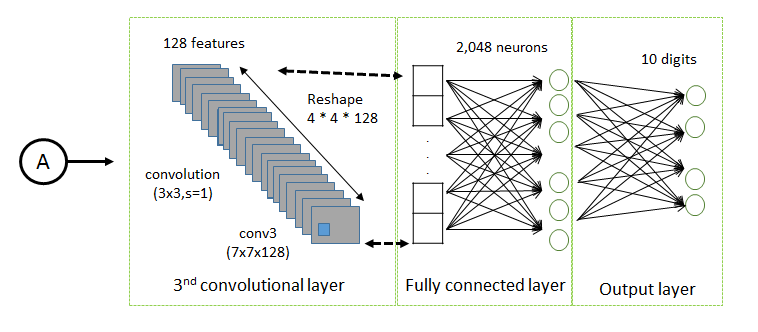

In [67]:
Image(filename ="architectureLeNet2.png", width=800, height=600 )

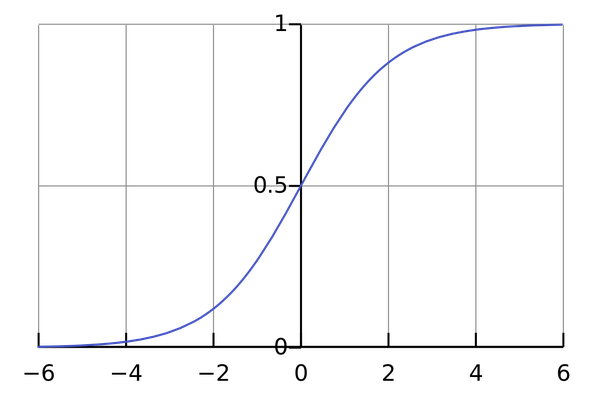

In [65]:
Image(filename ="softmax1.png", width=400, height=200 )

The expression for the softmax is 
\begin{align}
\sigma(\boldsymbol{x}) = \frac{\exp(x_k)}{\sum_j \exp(x_j)}
\end{align}


As a last step, we need to configure the learning process (i.e tell Keras how we want the model to be trained). Recall that a neural network is trained by minimization of a loss function which measure the error between the desired labels and the predictions from the network. As the final step of your "build_cnn_model" function, add a line, using the model.compile module from Keras (see https://keras.io/getting-started/sequential-model-guide/#compilation "compilation") that indicates that you want the learning to be driven by 
 - categorical entropy
 - optimizer = RMSProp (see http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf for details)
 - Use accuracy as your metric (see keras/metrics.py if you want details on the definition of the metric)
 
 Finally return your model

__You should now have your first convolutional net architecture !__

### 2.3.3 Double check

Starting from the csv data you stored in a panda data array, turn the 'label' column into a 'one hot encoding' using the command 'np_utils.to_categorical'. The one hot encoding scheme should return you binary vectors of the form (0,1,0,... 0) (for an image of 2 for example)

- Using the size of this new coding scheme, build your model by calling your function 'build_cnn_model ' with that size in argument. 

Finally Check your model with model.summary()

### 2.3.4 Preprocessing 

before training the network, we need to do a couple of preprocessing steps

- First normalize your original training and test sets (corresponding to the two csv files) so that the pixel values are between 0 and 1.
- Second, reshape (use the reshape function from numpy) the two data arrays so that they are of size number of samples x image size 1 x image size 2 x 1(The network takes images as inputs)
- Split the training data using the 'train_test_split' function from scikit learn so that you keep 8% of the samples from that set to test your model on top of the csv test data


### 2.3.5 Training

Train your Convolutional Neural Network using the function "model.fit_generator" from Keras (see https://keras.io/models/sequential/). We will use an additional trick which is often interesting in practice. Instead of training your model on the data directly, we will build a generator that will help us augment the training set with transformations of the original images. 

To do this, we iwll follow the steps below

- First build the generator by calling the function ImageDataGenerator from Keras with the following augmentations : we want to create images with a rotation range 10, zoom in range 0.1, width and height shift ranges of 0.1.
- Fit this generator to your training data using the .fit("training") function where you replace "training" with your variable




In [68]:
# put your code here



Train the model using the 'fit_generator' function from your Keras Neural Network 
(see https://keras.io/models/sequential/). 

The first argument to the fit_generator function is the generator However, instead of feeding the generator directly, we will use the combination

model.fit_generator(YourImageGenerator.flow(), ...)

Where the function __.flow()__ takes as first and second arguments the samples and labels from the training set and as a third argument, the size of the minibatches it returns. 


On top of the generator which is fed as the first argument with datagen.flow, Use the following additional arguments 

- We want 30 epochs
- set verbose to 2
- validation_data = the pair (X,y) that was returned by the 'train_test_split' function at step 2.3.4
- we want 700 steps per epochs
- Finally set callbacks=[reduce_lr]

While this is running, take advantage of the time you get to __study for the midterm evaluation__ !

### 2.3.6 Test and Display


We are now ready to test our first trained convolutional neural network !

- Use the __.predict_classes()__ function of your model with first input given by the test images (from the test csv file) and set verbose to 0 (except if you want to lose time)

- Once the model is trained, use the function randrange to select a few images (lets say 5) from the test set (csv test file)

- Finally use imshow and display the images together with their labels as returned by your CNN


In [ ]:
from random import randrange

# put your code here





